# Setup and Dependencies

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
#Python SQL toolkit and Object Relational Mapper.
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
#Reflect an existing database into a new model.
#Reflect the tables.
Base = automap_base()
Base.prepare(engine,reflect=True)

In [7]:
#We can view all of the classes that automap found.
Base.classes.keys()

['measurement', 'station']

In [8]:
#Save references to each table.
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
#Create our session (link) from Python to the DB.
session = Session(engine)

In [10]:
#Checking out columns.
Inspector = inspect(engine)

In [11]:
m_cols = Inspector.get_columns("Measurement")
for m in m_cols:
    print(m['name'], m['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
s_cols = Inspector.get_columns("Station")
for s in s_cols:
    print(s['name'], s['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

### Precipitation Analysis

In [13]:
#Finding the most recent date.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23')

In [14]:
type(most_recent_date[0])

str

In [15]:
most_recent_date[0]

'2017-08-23'

In [16]:
year = most_recent_date[0].split('-')
year

['2017', '08', '23']

In [17]:
#trying something
#x = dt.datetime.timestamp(dt.datetime(int(year[0]), int(year[1]), int(year[2])))
#y = 60*60*24 #1 day
#z = dt.datetime.fromtimestamp(x-y)
#z

In [18]:
print(dt.date(int(year[0]), int(year[1]), int(year[2])))

2017-08-23


In [19]:
#Design a query to retrieve the last 12 months of precipitation data and plot the results.
last_12months = dt.date(int(year[0]), int(year[1]), int(year[2])) -  dt.timedelta(days = 365)

#Calculate the date 1 year ago from the last data point in the database.
last_12months

#Perform a query to retrieve the date and precipitation scores.
pre = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_12months).all()
pre



[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [20]:
#Save the query results as a Pandas DataFrame and set the index to the date column.
pre_df = pd.DataFrame(pre).set_index('date')
pre_df

#Sort the dataframe by date.
pre_df = pre_df.sort_values('date')
pre_df



,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


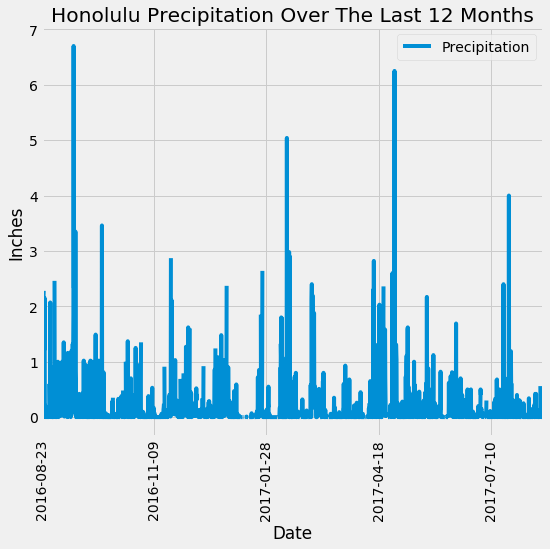

In [21]:
#Use Pandas Plotting with Matplotlib to plot the data.
pre_df.plot(figsize=(8,7), rot = 90, title = 'Honolulu Precipitation Over The Last 12 Months')
plt.xlabel('Date')
plt.xlim(0,len(pre_df.index))
plt.ylabel('Inches')
plt.legend(['Precipitation'])
plt.show()

In [22]:
#Use Pandas to calculate the summary statistics for the precipitation data.
summ_stat = pre_df.describe()
summ_stat

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis

In [23]:
#Checking out the columns again.
m_cols = Inspector.get_columns("Measurement")
for m in m_cols:
    print(m['name'], m['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [24]:
s_cols = Inspector.get_columns("Station")
for s in s_cols:
    print(s['name'], s['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [25]:
#Design a query to show how many stations are available in this dataset.
avail_stat = session.query(func.count(Station.id)).all()
avail_stat

[(9)]

In [26]:
#List of stations.
stat = session.query(Station.station).all()
all_stations = list(np.ravel(stat))
all_stations

['USC00519397',
 'USC00513117',
 'USC00514830',
 'USC00517948',
 'USC00518838',
 'USC00519523',
 'USC00519281',
 'USC00511918',
 'USC00516128']

In [27]:
#What are the most active stations? (i.e. what stations have the most rows)?
#List the stations and the counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
#Using the station id from the previous query, calculate the lowest temperature recorded, 
#highest temperature recorded, and average temperature of the most active station.
low_high_avg = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all() #Station USC00519281 has the highest number of observations (see above).
low_high_avg


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [29]:
#Choose the station with the highest number of temperature observations.
#Query the last 12 months of temperature observation data for this station and plot the results as a histogram.

#Query for last 12 months of temperatue observations for most active station.
last_year_temp = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= last_12months).all()
last_year_temp


[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [30]:
#Turning above query into dataframe.
temp_df = pd.DataFrame(last_year_temp).set_index('date') 
temp_df

#Sort the dataframe by date
#temp_df = temp_df.sort_values('date')
#temp_df

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


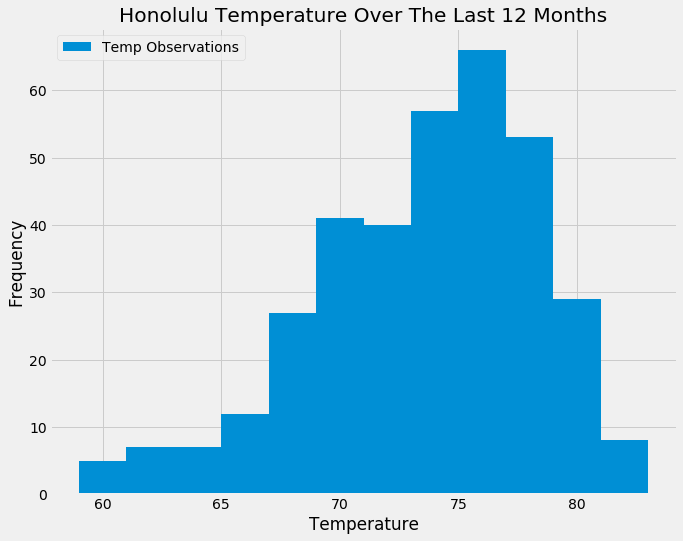

In [31]:
#Creating histogram.
temp_df['tobs'].plot.hist(bins = 12, figsize=(10,8), title = 'Honolulu Temperature Over The Last 12 Months')
plt.xlabel('Temperature')
plt.legend(['Temp Observations'])
plt.show()

## Bonus Challenge Assignment

In [32]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVG, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [33]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_temps = calc_temps('2017-03-10','2017-03-20')
trip_temps

[(65.0, 71.82089552238806, 82.0)]

In [34]:
temps_list = list(np.ravel(trip_temps))
temps_list

[65.0, 71.82089552238806, 82.0]

In [87]:
print(temps_list[2] - temps_list[0])

17.0


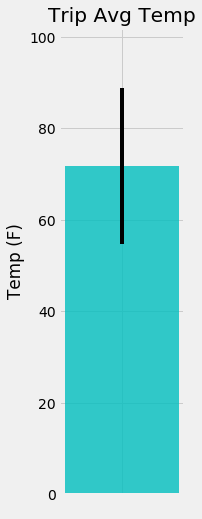

In [91]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots(figsize=(2,8))
#y_pos = [1]
x = np.arange(0,1, 1)
#plt.figsize(1,10)
plt.bar(0,temps_list[1], width=0.1, yerr =(temps_list[2] - temps_list[0]) , tick_label = ' ', color = 'c', alpha = .8) 
plt.title('Trip Avg Temp')
plt.ylabel('Temp (F)')
plt.ylim(0,(temps_list[2] + 20))
plt.show()


In [36]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel1 = [Measurement.station, func.sum(Measurement.prcp), Station.latitude, Station.longitude, Station.elevation]

rainfall_stat = session.query(*sel1).filter(Measurement.station == Station.station).\
    filter(Measurement.date >='2017-03-10').filter(Measurement.date <='2017-03-20').\
    group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()
rainfall_stat


[('USC00519523', 0.35, 21.33556, -157.71139, 19.5),
 ('USC00513117', 0.35, 21.4234, -157.8015, 14.6),
 ('USC00519281', 0.24, 21.45167, -157.84888999999998, 32.9),
 ('USC00514830', 0.19, 21.5213, -157.8374, 7.0),
 ('USC00517948', 0.06, 21.3934, -157.9751, 11.9),
 ('USC00519397', 0.0, 21.2716, -157.8168, 3.0),
 ('USC00516128', 0.0, 21.3331, -157.8025, 152.4)]

In [37]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [38]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

start_date = '2021-03-10'
end_date = '2021-03-20'
date_list_df = pd.date_range(start_date,end_date, freq = 'D')
date_list_df


DatetimeIndex(['2021-03-10', '2021-03-11', '2021-03-12', '2021-03-13',
               '2021-03-14', '2021-03-15', '2021-03-16', '2021-03-17',
               '2021-03-18', '2021-03-19', '2021-03-20'],
              dtype='datetime64[ns]', freq='D')

In [39]:
# Stip off the year and save a list of %m-%d strings ---???
trip = date_list_df.strftime('%m-%d')
trip

Index(['03-10', '03-11', '03-12', '03-13', '03-14', '03-15', '03-16', '03-17',
       '03-18', '03-19', '03-20'],
      dtype='object')

In [50]:
# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for d in trip:
    x=daily_normals(d)
    normals.append(x)
    
normals

[[(57.0, 69.12280701754386, 75.0)],
 [(60.0, 69.89285714285714, 82.0)],
 [(62.0, 69.88888888888889, 80.0)],
 [(56.0, 69.29629629629629, 77.0)],
 [(62.0, 70.32758620689656, 77.0)],
 [(58.0, 68.54716981132076, 76.0)],
 [(60.0, 69.70370370370371, 78.0)],
 [(57.0, 68.54, 75.0)],
 [(57.0, 67.7843137254902, 76.0)],
 [(60.0, 69.1, 75.0)],
 [(62.0, 70.11764705882354, 80.0)]]

In [41]:
unrav_normals = list(np.ravel(normals))
unrav_normals 

[57.0,
 69.12280701754386,
 75.0,
 60.0,
 69.89285714285714,
 82.0,
 62.0,
 69.88888888888889,
 80.0,
 56.0,
 69.29629629629629,
 77.0,
 62.0,
 70.32758620689656,
 77.0,
 58.0,
 68.54716981132076,
 76.0,
 60.0,
 69.70370370370371,
 78.0,
 57.0,
 68.54,
 75.0,
 57.0,
 67.7843137254902,
 76.0,
 60.0,
 69.1,
 75.0,
 62.0,
 70.11764705882354,
 80.0]

In [51]:
min_norms = unrav_normals[::3]
min_norms

[57.0, 60.0, 62.0, 56.0, 62.0, 58.0, 60.0, 57.0, 57.0, 60.0, 62.0]

In [75]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
norm_dict = {'Date': date_list_df, 'Min Temp': unrav_normals[::3], 'Avg Temp': unrav_normals[1::3], 'Max Temp': unrav_normals[2::3]}
trip_df = pd.DataFrame(norm_dict).set_index('Date')
trip_df #trip

,Min Temp,Avg Temp,Max Temp
Date,,,
2021-03-10,57.0,69.122807,75.0
2021-03-11,60.0,69.892857,82.0
2021-03-12,62.0,69.888889,80.0
2021-03-13,56.0,69.296296,77.0
2021-03-14,62.0,70.327586,77.0
2021-03-15,58.0,68.547170,76.0
2021-03-16,60.0,69.703704,78.0
2021-03-17,57.0,68.540000,75.0
2021-03-18,57.0,67.784314,76.0


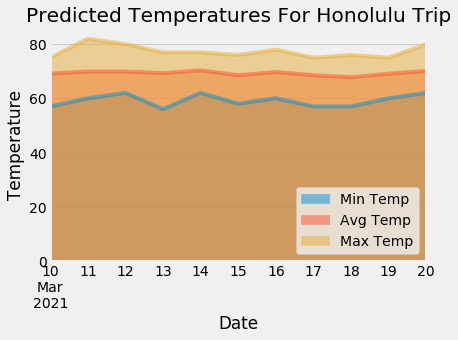

<Figure size 1440x1440 with 0 Axes>

In [92]:
# Plot the daily normals as an area plot with `stacked=False`

trip_df.plot.area(stacked = False) 
#trip_df.plot.area(stacked=False)
plt.title('Predicted Temperatures For Honolulu Trip')
plt.ylabel('Temperature')
plt.legend(loc='lower right')
plt.figure(figsize=(20,20))
plt.show()